<a href="https://colab.research.google.com/gist/klarteno/0eee61b980f8feca34c731338f03b5b7/copy-of-aml-final-project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import sys
import os

from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    LabelEncoder,
)  # , OneHotEncoder

from pprint import pprint
import time
import import_ipynb

c:\Users\androgo\anaconda3\envs\pytorch_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
import random, torch, os, numpy as np


def seed_everything(seed=42):
    os.environ["PYTHONHASHSEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False


seed_everything()

In [4]:
from cnn_bilstm_model import CNN_BILSTM

cnn_bilstm_model = CNN_BILSTM(input_size=23, num_classes=15)

In [30]:
%reload_ext autoreload
%autoreload 2

# import import_ipynb

from mlp_model import MLP_Model
from mlp_model_train import MLP_Model, train_MLP_Model, test_mlp

from utils_data_load import get_dataloaders, get_input_size, get_number_of_classes

In [28]:
train_loader, test_loader = get_dataloaders()
input_size = get_input_size()
num_classes = number_of_classes = get_number_of_classes()


MAX_EPOCHS = 10
# LEARNING_RATE   = 0.00000001
LEARNING_RATE = 0.0001

In [43]:
# do not run this if the model can be loaded next
import time

mlp_model = MLP_Model(inputSize=input_size, number_of_classes=number_of_classes)

timestart = time.time()
optimizer = torch.optim.SGD(mlp_model.parameters(), lr=LEARNING_RATE)

losses, accuracy = train_MLP_Model(mlp_model, optimizer, train_loader, MAX_EPOCHS)
total_time = time.time() - timestart

# 10 mn 3.8 s

100%|██████████| 65329/65329 [08:26<00:00, 128.90it/s]


epoch 0 cost 506.826258 sec


100%|██████████| 65329/65329 [08:01<00:00, 135.63it/s]


epoch 1 cost 481.659410 sec


100%|██████████| 65329/65329 [07:54<00:00, 137.62it/s]


epoch 2 cost 474.707262 sec


100%|██████████| 65329/65329 [09:49<00:00, 110.73it/s]


epoch 3 cost 589.975560 sec


100%|██████████| 65329/65329 [10:31<00:00, 103.48it/s]


epoch 4 cost 631.344762 sec


100%|██████████| 65329/65329 [10:57<00:00, 99.34it/s] 


epoch 5 cost 657.603606 sec


100%|██████████| 65329/65329 [18:20<00:00, 59.38it/s] 


epoch 6 cost 1100.209411 sec


100%|██████████| 65329/65329 [07:37<00:00, 142.86it/s]


epoch 7 cost 457.304757 sec


100%|██████████| 65329/65329 [07:21<00:00, 147.85it/s]


epoch 8 cost 441.855247 sec


100%|██████████| 65329/65329 [07:12<00:00, 151.14it/s]


epoch 9 cost 432.257484 sec
Finished Training


In [44]:
from statistics_utils_store import StatisticsSaver

statisticsSaver = StatisticsSaver()

statisticsSaver.save_accuracy(accuracy)
statisticsSaver.save_losses(losses)
statisticsSaver.save_total_training_time(total_time)


statisticsSaver.set_trainned_model(mlp_model)
statisticsSaver.set_trainned_optimizer(optimizer)

output_dir = "out_mlp"

if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    print("Directory ", output_dir, " Created ")

# file_path = output_dir + '/'+ 'file_mlp_model_params_78_features_10_epochs'
file_path = output_dir + "/" + "file_mlp_model_params_23_features_10_epochs"
statisticsSaver.save_trainned_model(file_path, MAX_EPOCHS)
statisticsSaver.save_model_params(file_path, MAX_EPOCHS)

In [31]:
input_size = X_train.shape[1]
mlp_model = MLP_Model(inputSize=input_size, number_of_classes=num_classes)

# was trained for 10 epochs
mlp_model.load_state_dict(
    torch.load("out_mlp/file_mlp_model_params_23_features_10_epochs_params.pth")[
        "model_state_dict"
    ]
)
# mlp_model.load_state_dict(torch.load('models/titanic_model.pt'))
mlp_model.eval()

MLP_Model(
  (fltn): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=23, out_features=128, bias=True)
  (bc1): GroupNorm(4, 128, eps=1e-05, affine=True)
  (relu1): ReLU(inplace=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (bc2): GroupNorm(4, 128, eps=1e-05, affine=True)
  (relu2): ReLU(inplace=True)
  (fc21): Linear(in_features=128, out_features=128, bias=True)
  (bc21): GroupNorm(4, 128, eps=1e-05, affine=True)
  (relu21): ReLU(inplace=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (bc3): GroupNorm(4, 64, eps=1e-05, affine=True)
  (relu3): ReLU(inplace=True)
  (fc4): Linear(in_features=64, out_features=64, bias=True)
  (bc4): GroupNorm(4, 64, eps=1e-05, affine=True)
  (relu4): ReLU(inplace=True)
  (fc5): Linear(in_features=64, out_features=15, bias=True)
  (relu): ReLU(inplace=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (logsm): LogSoftmax(dim=1)
)

In [41]:
def plot_trainning(losses, accuracy):
    plt.title("Loss Trend")
    plt.plot(losses)
    plt.xlabel("Sample time")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Train Accuracy")
    plt.plot(accuracy)
    plt.xlabel("Sample time")
    plt.ylabel("Accuracy (%)")
    plt.show()

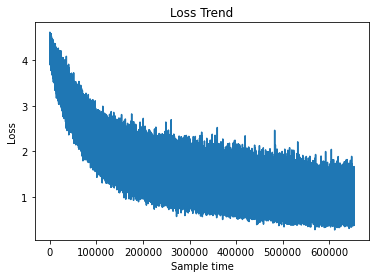

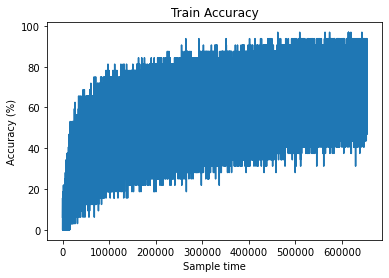

In [49]:
plot_trainning(losses, accuracy)

100%|██████████| 22093/22093 [01:26<00:00, 254.02it/s]



Test set: Average loss: 2.1647, Accuracy: 156100/706969 (22%)



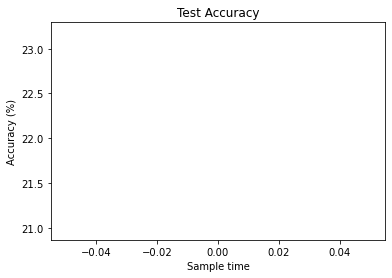

Average test accuracy is : 22.080176075612933


In [50]:
test_accuracy = test_mlp(mlp_model, test_loader)

plt.title("Test Accuracy")
plt.plot(test_accuracy)

plt.xlabel("Sample time")
plt.ylabel("Accuracy (%)")
plt.show()

avg_test_accuracy = np.mean(test_accuracy)
print("Average test accuracy is : " + str(avg_test_accuracy))

## Feature importance

In [33]:
from captum.attr import IntegratedGradients

# DEVICE = 'cpu'

# mlp_model.eval()
# mlp_model=mlp_model.to(DEVICE)

mlp_model = mlp_model.to("cpu")
mlp_model.train()

ig = IntegratedGradients(mlp_model)

In [ ]:
# Helper method to print importances and visualize distribution
def visualize_importances(
    feature_names,
    importances,
    title="Average Feature Importances",
    plot=False,
    axis_title="Features",
):
    print(title)
    for i in range(len(feature_names)):
        print(feature_names[i], ": ", "%.3f" % (importances[i]))
    x_pos = np.arange(len(feature_names))

    if plot:
        plt.figure(figsize=(14, 8))
        plt.bar(x_pos, importances, align="center")
        plt.xticks(x_pos, feature_names, wrap=True)
        plt.xlabel(axis_title)
        plt.title(title)


visualize_importances(classes_y, np.mean(attr, axis=0))

## CNN-BILSTM model 

In [26]:
MAX_EPOCHS = 10
# LEARNING_RATE   = 0.00000001
LEARNING_RATE = 0.001

In [32]:
%reload_ext autoreload
%autoreload 2

# import import_ipynb
from cnn_bilstm_model import CNN_BILSTM
from cnn_bilstm_model import train_CNN_BILSTM_Model, test_CNN_BILSTM_model, get_stats

In [ ]:
import time

cnn_bilstm_model = CNN_BILSTM(input_size=input_size, num_classes=number_of_classes)

timestart = time.time()
optimizer = torch.optim.Adam(cnn_bilstm_model.parameters(), lr=LEARNING_RATE)

losses, accuracy = train_CNN_BILSTM_Model(
    cnn_bilstm_model, optimizer, train_loader, MAX_EPOCHS
)
total_time = time.time() - timestart

# aprox 600 mn

In [39]:
from statistics_utils_store import StatisticsSaver

statisticsSaver = StatisticsSaver()

accuracy = 0
losses = 0
total_time = 625

statisticsSaver.save_accuracy(accuracy)
statisticsSaver.save_losses(losses)
statisticsSaver.save_total_training_time(total_time)


statisticsSaver.set_trainned_model(cnn_bilstm_model)
statisticsSaver.set_trainned_optimizer(optimizer)

output_dir = "out_cnn_bilstm"

if not os.path.exists(output_dir):
    os.mkdir(output_dir)
    print("Directory ", output_dir, " Created ")

# file_path = output_dir + '/'+ 'file_mlp_model_params_78_features_10_epochs'
file_path = (
    output_dir + "/" + "file_cnn_bilstm_model_params_23_features_10_epochs_625mn"
)
statisticsSaver.save_trainned_model(file_path, MAX_EPOCHS)
statisticsSaver.save_model_params(file_path, MAX_EPOCHS)

Directory  out_cnn_bilstm  Created 


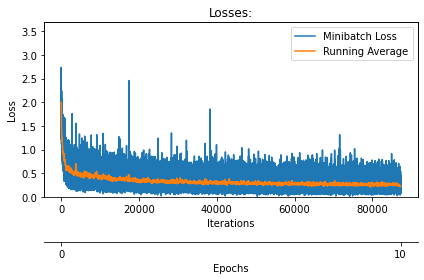

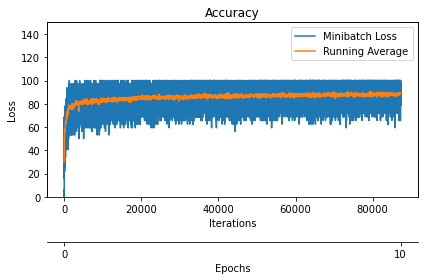

In [60]:
from utils.helper_plotting import plot_trainning_eval

losses, accuracy_trainning = get_stats()

plot_trainning_eval(losses, MAX_EPOCHS, "Losses:")
plot_trainning_eval(accuracy_trainning, MAX_EPOCHS, "Accuracy")

In [61]:
accuracy_test = test_CNN_BILSTM_model(cnn_bilstm_model, test_loader)
accuracy_test

100%|██████████| 22093/22093 [48:29<00:00,  7.59it/s] 


Test set: Average loss: 2.5536, Accuracy: 435613/706969 (62%)



61.61698744923752

# References
[1] Iman Sharafaldin, Arash Habibi Lashkari, and Ali A. Ghorbani, “Toward Generating a New Intrusion Detection Dataset and Intrusion Traffic Characterization”, 4th International Conference on Information Systems Security and Privacy (ICISSP), Purtogal, January 2018